In [9]:
import torch, torchvision
from torch.autograd import Variable
import numpy as np
from torch.utils.data import DataLoader, Dataset
import itertools, math
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
G = torch.load('/home/maf388/bayesganfuture/models/c10dcgan.pt')

In [11]:
class GanDataLoader(DataLoader):
    def __init__(self, generator, batch_size):
        self.G = generator.cuda()
        self.batch_size = batch_size

    def __iter__(self):
        return self
    
    def __next__(self):
        z = Variable(torch.randn(self.batch_size, self.G.z_dim).cuda())
        return self.G(z).detach()
    
    def __len__(self):
        inf = 2**63-1
        return inf

In [12]:
thisLoader = GanDataLoader(G,32)

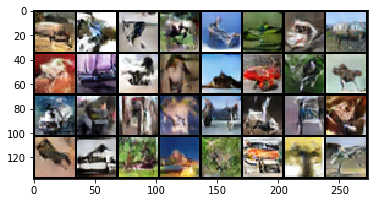

In [13]:
batch = next(thisLoader)
imgs = torchvision.utils.make_grid(batch.cpu().data, normalize=True, nrow=8)
plt.imshow(np.transpose(imgs, (1, 2, 0)))